In [0]:
#Sai Venkatesh
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import collections

############################################################################
# Data Load

def data_division(batch = 4, augment = False):
    
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform) # change download True when submit
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                             shuffle=False, num_workers=2)
    if augment:
        transform = transforms.Compose(
                    [transforms.RandomHorizontalFlip(),
                     transforms.RandomCrop(size=[32,32], padding=4),
                     transforms.ToTensor(),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform) # change download True when submit
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                              shuffle=True, num_workers=2)


    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return(trainloader, testloader, classes)


In [0]:
##########################################################################
# Train and test the network for each epoch

def train_test_network(trainloader, testloader, net, criterion, optimizer, epochs = 2, onehotencoding = False):
    #Train
    train_accuracy = collections.defaultdict(int)
    loss_dic = collections.defaultdict(int)        
    train_correct = 0
    train_total = 0
    
    #Test
    test_accuracy = collections.defaultdict(int)    
    test_correct = 0
    test_total = 0
    
    for epoch in range(epochs):  # loop over the dataset multiple times
    ########################################################################
    # Train the network
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            if onehotencoding:
                labels = onehot(labels.view(labels.shape[0],1),labels.shape[0],10)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            accuracy = (100 * train_correct / train_total)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item() # loss is a tensor
            if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(running_loss)
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                loss_dic[epoch + 1] = running_loss / 2000
                running_loss = 0.0
                
        train_accuracy[epoch + 1] = accuracy
        
    ########################################################################
    # Test the network
        with torch.no_grad(): #no gradient descent
            for data_test in testloader:
                images, labels_test = data_test
                outputs_test = net(images)
                _, predicted_test = torch.max(outputs_test.data, 1)
                test_total += labels_test.size(0)
                test_correct += (predicted_test == labels_test).sum().item()

            #print('Accuracy of the network on the 10000 test images: %d%%' % (100 * test_correct / test_total))
            test_accuracy[epoch + 1] = (100 * test_correct / test_total)
        

    print('Finished Training')
    return(train_accuracy, loss_dic, test_accuracy)

In [0]:
############################################################################
# Train and test the network for each epoch

def train_test_networkMSE(trainloader, testloader, net, criterion, optimizer, epochs = 2, onehotencoding = False):
    #Train
    train_accuracy = collections.defaultdict(int)
    loss_dic = collections.defaultdict(int)        
    train_correct = 0
    train_total = 0
    
    #Test
    test_accuracy = collections.defaultdict(int)    
    test_correct = 0
    test_total = 0
    
    for epoch in range(epochs):  # running loop over the dataset multiple times
    ########################################################################
    # Train the network
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            if onehotencoding:
                labels = onehot(labels.view(labels.shape[0],1),labels.shape[0],10)

            # set the parameter gradients to zero
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            print(predicted)
            print(labels)
            train_correct += (predicted == labels).sum().item()
            accuracy = (100 * train_correct / train_total)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics obtained
            running_loss += loss.item() # loss is a tensor
            if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(running_loss)
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                loss_dic[epoch + 1] = running_loss / 2000
                running_loss = 0.0
                
        train_accuracy[epoch + 1] = accuracy
        
    ##########################################################################
    # Test the network
        with torch.no_grad(): #no gradient descent
            for data_test in testloader:
                images, labels_test = data_test
                outputs_test = net(images)
                _, predicted_test = torch.max(outputs_test.data, 1)
                test_total += labels_test.size(0)
                test_correct += (predicted_test == labels_test).sum().item()

            #print('Accuracy of the network on the 10000 test images: %d%%' % (100 * test_correct / test_total))
            test_accuracy[epoch + 1] = (100 * test_correct / test_total)
            
        #train_accuracy[epoch + 1] = net.accuracy(trainloader)
        #test_accuracy[epoch + 1] = net.accuracy(testloader)

    print('Finished Training')
    return(train_accuracy, loss_dic, test_accuracy)

In [0]:
##########################################################################
#  Defining a Cross Entropy Loss function and a SGD optimizer

def CE_loss(net, lr = 0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)
    return(criterion, optimizer)

In [0]:
########################################################################
#  Defining a Mean Squared Error as Loss function and SGD optimizer

def MSE_loss(net, lr = 0.001):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)
    return(criterion, optimizer)

In [0]:
########################################################################
#  code for Plotting the graphs

def plot(dictionary, title, x = "", y = "", _print = "", ):
    print(_print)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.plot(list(dictionary.keys()),list(dictionary.values()),'-o')
    plt.savefig(title + '.png')
    plt.show()
    plt.close()

In [0]:
##########################################################################
#  Change the code to have only a single fully connected layer. 
#  The model will have a single layer that connects the input to the output.

def single_fully_connected_model():
    trainloader, testloader, classes = data_division(batch = 4)
    
    import singleFC
    net = singleFC.Net()
    criterion, optimizer = CE_loss(net)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    #test_accuracy = test_network(testloader = testloader, net = net)
    plot(dictionary = train_accuracy, title = "Single_Fully_Connected_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "2. Single Fully Connected Layer - training accuracy")
    plot(dictionary = loss_dic, title = "Single_Fully_Connected_Loss", x = "Epochs", y = "Loss", _print=  "2. Single Fully Connected Layer - loss")
    plot(dictionary = test_accuracy, title = "Single_Fully_Connected_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "2. Single Fully Connected Layer - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
##########################################################################
#  Multiple fully connected layers

def multiple_fully_connected_model():
    trainloader, testloader, classes = data_division(batch = 4)
    
    import multipleFC
    
    ########################################################################
    #  Multiple fully connected layers with ReLU
    net = multipleFC.Net()
    criterion, optimizer = CE_loss(net)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Multiple_Fully_Connected_ReLU_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "3. Multiple Fully Connected Layer with RelU - training accuracy")
    plot(dictionary = loss_dic, title = "Multiple_Fully_Connected_ReLU_Loss", x = "Epochs", y = "Loss", _print=  "3. Multiple Fully Connected Layer with RelU - loss")
    plot(dictionary = test_accuracy, title = "Multiple_Fully_Connected_ReLU_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "3. Multiple Fully Connected Layer with RelU - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    ########################################################################
    #  Multiple fully connected layers without ReLU
    net = multipleFC.Net(relu = False)
    criterion, optimizer = CE_loss(net)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Multiple_Fully_Connected_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "3. Multiple Fully Connected Layer without ReLU - training accuracy")
    plot(dictionary = loss_dic, title = "Multiple_Fully_Connected_Loss", x = "Epochs", y = "Loss", _print=  "3. Multiple Fully Connected Layer without ReLU - loss")
    plot(dictionary = test_accuracy, title = "Multiple_Fully_Connected_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "3. Multiple Fully Connected Layer without ReLU - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
##########################################################################
#  Example Tutorial - two convolutional layers along with maxpooling layers before the fully connected layers

def basic_tutorial_model():
    trainloader, testloader, classes = data_division(batch = 4)
    
    import examplenetwork
    net = examplenetwork.Net()
    criterion, optimizer = CE_loss(net)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "4. Two conv with three dense layers - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_Loss", x = "Epochs", y = "Loss", _print=  "4. Two conv with three dense layers - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "4. Two conv with three dense layers - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
########################################################################
#  Example Tutorial with batches of different sizes

def basic_tutorial_model_batch_sizes():
    import examplenetwork
    net = examplenetwork.Net()
    criterion, optimizer = CE_loss(net)
    
    ############################################################################
    #  two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with batch size 1
    trainloader, testloader, classes = data_division(batch = 1)

    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_batchsize1_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 1 sample per batch - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_batchsize1_Loss", x = "Epochs", y = "Loss", _print=  "5. Two conv with three dense layers with 1 sample per batch - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_batchsize1_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 1 sample per batch - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    
    ############################################################################
    #  two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with batch size 4
    trainloader, testloader, classes = data_division(batch = 4)

    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_batchsize4_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 4 sample per batch - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_batchsize4_Loss", x = "Epochs", y = "Loss", _print=  "5. Two conv with three dense layers with 4 sample per batch - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_batchsize4_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 4 sample per batch - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    ############################################################################
    #  two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with batch size 1000
    trainloader, testloader, classes = data_division(batch = 1000)

    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_batchsize1000_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 1000 sample per batch - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_batchsize1000_Loss", x = "Epochs", y = "Loss", _print=  "5. Two conv with three dense layers with 1000 sample per batch - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_batchsize1000_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "5. Two conv with three dense layers with 1000 sample per batch - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
############################################################################
#  Example Tutorial with different learning rates

def basic_tutorial_model_learning_rates():
    trainloader, testloader, classes = data_division(batch = 4)
    
    import examplenetwork
    net = examplenetwork.Net()
    ############################################################################
    # two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with learning rate 10
    criterion, optimizer = CE_loss(net, lr = 10)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_learningrate10_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 10 - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_learningrate10_Loss", x = "Epochs", y = "Loss", _print=  "6. Two conv with three dense layers with a learning rate of 10 - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_learningrate10_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 10 - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    ############################################################################
    # two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with learning rate 0.1
    criterion, optimizer = CE_loss(net, lr = 0.1)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_learningratepoint1_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.1 - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_learningratepoint1_Loss", x = "Epochs", y = "Loss", _print=  "6. Two conv with three dense layers with a learning rate of 0.1 - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_learningratepoint1_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.1 - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    ############################################################################
    # two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with learning rate 0.01
    criterion, optimizer = CE_loss(net, lr = 0.01)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_learningratepoint01_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.01 - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_learningratepoint01_Loss", x = "Epochs", y = "Loss", _print=  "6. Two conv with three dense layers with a learning rate of 0.01 - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_learningratepoint01_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.01 - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))
    
    
    ############################################################################
    # two convolutional layers along with maxpooling layers before the fully connected layers on the CIFAR10 data with learning rate 0.0001
    criterion, optimizer = CE_loss(net, lr = 0.0001)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=50)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_learningratepoint0001_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.0001 - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_learningratepoint0001_Loss", x = "Epochs", y = "Loss", _print=  "6. Two conv with three dense layers with a learning rate of 0.0001 - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_learningratepoint0001_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "6. Two conv with three dense layers with a learning rate of 0.0001 - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))


In [0]:
################################################################################
#  Example Tutorial using augmented training data

def basic_tutorial_model_augmented_data():
    trainloader, testloader, classes = data_division(batch = 4, augment = True)
    
    import examplenetwork
    net = examplenetwork.Net()
    criterion, optimizer = CE_loss(net)
    train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_AugmentedData_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "7. Two conv with three dense layers with Augmented Data - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_AugmentedData_Loss", x = "Epochs", y = "Loss", _print=  "7. Two conv with three dense layers with Augmented Data - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_AugmentedData_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "7. Two conv with three dense layers with Augmented Data - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
##########################################################################
#  Example Tutorial with Mean Squared Error loss function

def basic_tutorial_model_MSELoss():
    trainloader, testloader, classes = data_division(batch = 10, augment = False)
    
    import examplenetwork
    net = examplenetwork.Net()
    criterion, optimizer = MSE_loss(net)
    #train_accuracy, loss_dic, test_accuracy = train_test_network(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer=optimizer, epochs=25)
    train_accuracy, loss_dic, test_accuracy = train_test_networkMSE(trainloader = trainloader, testloader = testloader, net=net, criterion=criterion, optimizer = optimizer, epochs = 25, onehotencoding = True)
    plot(dictionary = train_accuracy, title = "Two_conv_with_three_dense_MSELoss_Training_Accuracy", x = "Epochs", y = "Accuracy", _print=  "8. Two conv with three dense layers with MSELoss - training accuracy")
    plot(dictionary = loss_dic, title = "Two_conv_with_three_dense_MSELoss_Loss", x = "Epochs", y = "Loss", _print=  "8. Two conv with three dense layers with MSELoss - loss")
    plot(dictionary = test_accuracy, title = "Two_conv_with_three_dense_MSELoss_Testing_Accuracy", x = "Epochs", y = "Accuracy", _print=  "8. Two conv with three dense layers with MSELoss - testing accuracy")
    print('Parameters of the network: %d' % sum(p.numel() for p in net.parameters() if p.requires_grad))

In [0]:
def onehot(y,batch_size,nb_digits):
    y_onehot = torch.FloatTensor(batch_size, nb_digits).zero_()
    y_onehot.scatter_(1, y, 1)
    return y_onehot

In [0]:
def main():
    
    #single_fully_connected_model() #2
    #multiple_fully_connected_model() #3
    
    basic_tutorial_model() #1, 4
    #basic_tutorial_model_batch_sizes() #5
    #basic_tutorial_model_learning_rates() #6'''
    #basic_tutorial_model_augmented_data() #7
    #basic_tutorial_model_MSELoss() #8

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.269
[1,  4000] loss: 1.927
[1,  6000] loss: 1.714
[1,  8000] loss: 1.602
[1, 10000] loss: 1.542
[1, 12000] loss: 1.504
[2,  2000] loss: 1.432
[2,  4000] loss: 1.402
[2,  6000] loss: 1.338
[2,  8000] loss: 1.340
[2, 10000] loss: 1.320
[2, 12000] loss: 1.311
[3,  2000] loss: 1.225
[3,  4000] loss: 1.201
[3,  6000] loss: 1.231
[3,  8000] loss: 1.189
[3, 10000] loss: 1.206
[3, 12000] loss: 1.181
[4,  2000] loss: 1.081
[4,  4000] loss: 1.135
[4,  6000] loss: 1.125
[4,  8000] loss: 1.076
[4, 10000] loss: 1.101
[4, 12000] loss: 1.098
[5,  2000] loss: 0.997
[5,  4000] loss: 1.016
[5,  6000] loss: 1.032
[5,  8000] loss: 1.043
[5, 10000] loss: 1.022
[5, 12000] loss: 1.032
[6,  2000] loss: 0.925
[6,  4000] loss: 0.974
[6,  6000] loss: 0.976
[6,  8000] loss: 0.968
[6, 10000] loss: 0.982
[6, 12000] loss: 0.970
[7,  2000] loss: 0.912
[7,  4000] loss: 0.905
[7,  6000] loss: 0.901
[7,  8000] loss: 0.928
[7, 

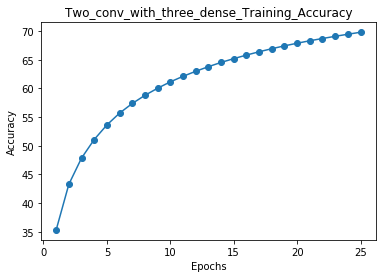

4. Two conv with three dense layers - loss


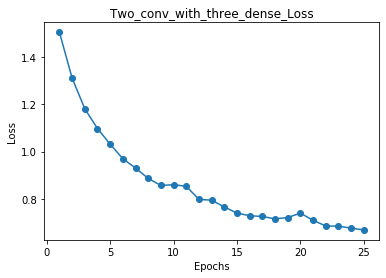

4. Two conv with three dense layers - testing accuracy


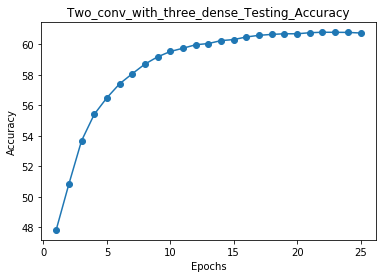

Parameters of the network: 62006


In [96]:
if __name__ == '__main__':
    main()